<a href="https://colab.research.google.com/github/momo87240/Inventec-data-analysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

Mounted at /content/drive


# Read the data set
In this dataset, we have 100 data points and 18 variables. These variables offer insights into individuals' political party preferences and their respective states of residence. Additionally, the dataset includes variables labeled from 1 to 15, which I interpret as representing survey questions 1 to 15.\
For this analysis, I intend to treat ${{party}}$ as the response variable, and ${{state}}$ along with ${{Question\ 1 }}$ to ${{15}}$ as explanatory variables, with the aim of constructing predictive models."

In [2]:
# import data
path = '/content/drive/MyDrive/Inventec-data-analysis/TEST.csv'
raw = pd.read_csv(path)
display(raw)

,name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Warner,D,VA,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
96,Warren,D,MA,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
97,Whitehouse,D,RI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


# Exploratory Data Analysis

## Response Variable
We can easily tell that 'R' represents the Republican Party and 'D' represents the Democratic Party, both of which are the two major political parties in the US. However, the symbol 'I' does not correspond to any major party affiliation in the US; therefore, we treat it as a missing value in this context.

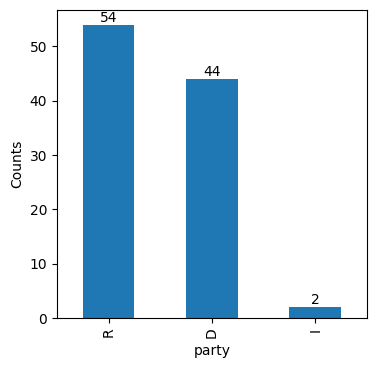

In [3]:
ax = pd.value_counts(raw.loc[:, 'party']).plot.bar(figsize=(4, 4))
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')
plt.xlabel('party')
plt.ylabel('Counts')
plt.show()

## Explanatory Variables

### ${{state}}$
This dataset comprises 50 states, each associated with 2 individuals. The sample survey was conducted among 100 individuals, with 2 individuals sampled from each state.


### ${{Question\ 1}}$ to ${{15}}$

We observe that for most of the values among the 15 questions, they are either 1 or 0. This suggests that, intuitively, we can consider all 15 questions as yes/no questions. However, it is notable that some values are 0.5, which could potentially represent missing values in this context. Also, we noticed that some variables, such as ${{Question\ 8}}$, exhibit a notably uneven distribution between the two options. This disparity raises the potential concern that these variables might not sufficiently contribute information to the response variable.

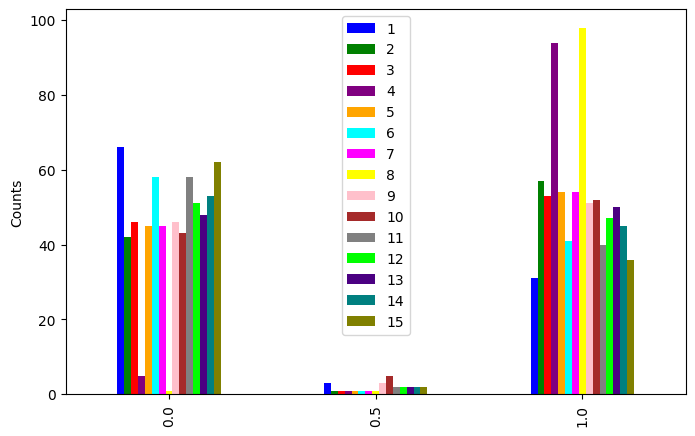

In [4]:
raw.iloc[:, 3:18].apply(pd.value_counts).plot.bar(figsize=(8, 5), color= ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'pink', 'brown', 'gray', 'lime', 'indigo', 'teal', 'olive'])
plt.ylabel('Counts')
plt.show()

# Data Preprocessing

## Missing Data

We have a total of 10 data points, which constitute 10% of the dataset, containing missing values. It might be dangerous to drop all of them, so we will be careful to deal with the missing data.
1.   We observed that the 74th data point is evidently uninformative; therefore, we decided to drop it.
2.   We decided to impute the explanatory variables using the mode. The reason why we choose not to impute the value by prediction is that we have the ${{state}}$ variable that contains 50 categories, so with a small sample size of only 100, it may lead to the curse of dimensionality, potentially increasing concerns about overfitting issues. Besides, we should remain cautious about using mode imputation, as it may result in inaccuracies due to the fact that the correlations between explanatory variables are not replicated.
3.   Since the explanatory variables do not provide us with any information about the response variable, we have decided to drop the data points with missing response variable.

To summarize, we have dropped a total of 3 data points, leaving us with 97 data points.


In [5]:
# missing data
display(pd.concat([raw[raw['party'] == 'I'], raw[raw.iloc[:, 3:18].isin([0.5]).any(axis=1)]]))
# drop the 74th data point
df = raw.drop(74)
# impute with mode
for column in df.columns[3:18]:
    mode_value = df[column].mode()[0]
    df[column] = df[column].replace(0.5, mode_value)
# remove the data witho missing response
df = df[df['party'] != 'I']

print("Total number of rows:", df.shape[0])

,name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
50,King,I,ME,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
79,Sanders,I,VT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
9,Boxer,D,CA,0.5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
13,Capito,R,WV,0.5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
21,Coons,D,DE,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.5,1.0,1.0,0.0,1.0,1.0
35,Franken,D,MN,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.5,1.0,1.0,0.0,1.0,1.0
38,Graham,R,SC,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0
55,Lee,R,UT,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
78,Rubio,R,FL,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5


Total number of rows: 97


## Encoding Categorical Variables and Train-Test Split
1. ${{state}}$ is a categorical variable, so we should perform dummy encoding first. After encoding, we have a total of 64 variables.
2. Since the labels for ${{party}}$ are not balanced, we use stratification to ensure that the ratio between the two labels remains unchanged after splitting.
3. We have 97 data points. We set the train set to be 80 and test size to be 17.
4. Given the relatively modest sample size and the presence of 64 explanatory variables, we should be aware of potential overfitting issues.

In [6]:
X = pd.concat([df.iloc[:,3:18], pd.get_dummies(df['state'], prefix='state', drop_first=True)], axis=1)
print("Total number of columns:", X.shape[1])
y = df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=17, random_state=42, stratify = df['party'])

Total number of columns: 64


# Model

## Logistic Regression
Logistic regression is a linear classification algorithm, which can be used in binary classification.
1. We constructed the model `clf_LR1` using all explanatory variables initially. Although the accuracy rate stands at 94.12%, indicating satisfactory performance, it is crucial to be aware of the potential overfitting issues, as previously discussed.
2. We then constructed the model `clf_LR2` with 10-fold cross-validation to find the best hyperparameter for the L1 norm regularization. The reason we chose the L1 norm is that it allows us to build a stable model while performing feature selection simultaneously, which can help prevent overfitting issues.
Despite achieving a perfect accuracy rate of 100% with this model, it is essential to maintain a degree of caution and consider the possibility of preprocessing issues or the overfitting isssues that might be influencing the results.

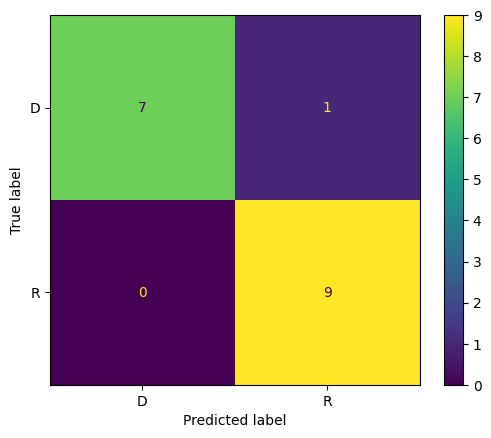

The accuracy rate is:  94.12 %


In [7]:
clf_LR1 = LogisticRegression(random_state=0).fit(X_train, y_train)
predictions = clf_LR1.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_LR1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_LR1.classes_)
disp.plot()
plt.show()
print("The accuracy rate is: ", np.round(100*sum(predictions==y_test)/len(y_test),2),"%")

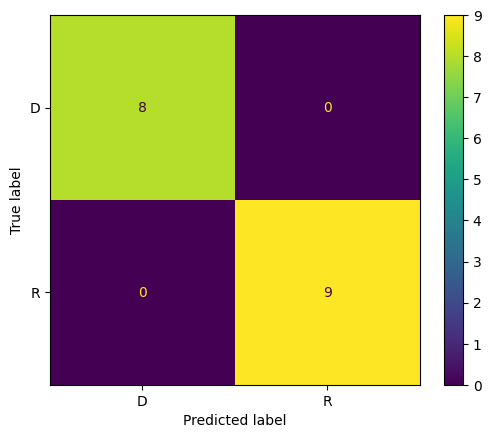

The accuracy rate is:  100.0 %


In [8]:
clf_LR2 = LogisticRegressionCV(random_state=0, cv=10, penalty='l1', solver='saga').fit(X_train, y_train)
predictions = clf_LR2.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_LR2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_LR2.classes_)
disp.plot()
plt.show()
print("The accuracy rate is: ", np.round(100*sum(predictions==y_test)/len(y_test),2),"%")

## Random Forest
1. We've done the feature selection in the last part. The concern was that we achieve 100% accuracy, which may be a sign of overfitting and may not be a generalized model to new and unseen data.
2. In this part, we chose Random Forest, a non-linear classification algorithm capable of capturing complex interactions among features, in contrast to logistic regression.
3. The accuracy rate drops to 88.24%, which is not too bad. The lower accuracy of the random forest model might be attributed to capturing non-linear interactions that logistic regression overlooked, resulting in a more realistic but potentially slightly less accurate model.
4. One potential issue we should be concerned about here is that misclassification may arise from incorrect predictions of part 'D', which has a smaller proportion in this dataset. Even with stratification, there might still be a significant class imbalance present in the data, especially if the minority class is heavily underrepresented. This imbalance can impact the model's ability to learn and generalize patterns from the minority class. However, although the classifications are not evenly distributed, they are still quite close, so it may not be a big concern.

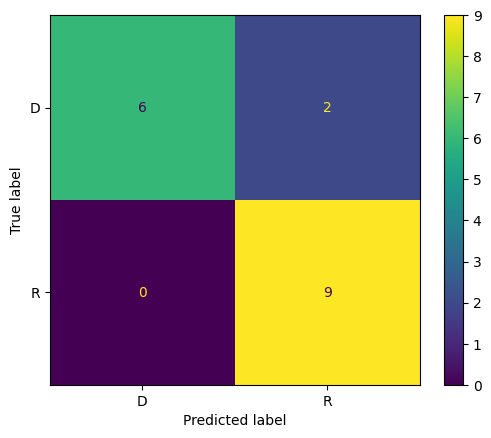

The accuracy rate is:  88.24 %


In [9]:
non_zero_col = np.where(clf_LR2.coef_!= 0)[1]
clf_RF = RandomForestClassifier(max_depth=5, random_state=0).fit(X_train.iloc[:,non_zero_col], y_train)
predictions = clf_RF.predict(X_test.iloc[:,non_zero_col])
cm = confusion_matrix(y_test, predictions, labels=clf_RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_RF.classes_)
disp.plot()
plt.show()
print("The accuracy rate is: ", np.round(100*sum(predictions==y_test)/len(y_test),2),"%")

# Summary
1. There is 10% missing data in this survey. We can consider designing the questionnaires in a way that can further improve the response rate and help mitigate the issue of missing data.
2. We've experimented with two binary classification models in this analysis. While we achieved a higher accuracy rate with the logistic model, the random forest prediction model is more suitable for making generalized predictions.